## Preparação do ambiente

In [50]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [3]:
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species\r\n5.1,3.5,1.4,0.2,setosa\r\n4.9,3,1.4,0.2,setosa\r\n4.7,3.2,1.3,0.2,setosa\r\n4.6,3.1,1.5,0.2,setosa\r\n5,3.6,1.4,0.2,setosa\r\n5.4,3.9,1.7,0.4,setosa\r\n4.6,3.4,1.4,0.3,setosa\r\n5,3.4,1.5,0.2,setosa\r\n4.4,2.9,1.4,0.2,setosa\r\n4.9,3.1,1.5,0.1,setosa\r\n5.4,3.7,1.5,0.2,setosa\r\n4.8,3.4,1.6,0.2,setosa\r\n4.8,3,1.4,0.1,setosa\r\n4.3,3,1.1,0.1,setosa\r\n5.8,4,1.2,0.2,setosa\r\n5.7,4.4,1.5,0.4,setosa\r\n5.4,3.9,1.3,0.4,setosa\r\n5.1,3.5,1.4,0.3,setosa\r\n5.7,3.8,1.7,0.3,setosa\r\n5.1,3.8,1.5,0.3,setosa\r\n5.4,3.4,1.7,0.2,setosa\r\n5.1,3.7,1.5,0.4,setosa\r\n4.6,3.6,1,0.2,setosa\r\n5.1,3.3,1.7,0.5,setosa\r\n4.8,3.4,1.9,0.2,setosa\r\n5,3,1.6,0.2,setosa\r\n5,3.4,1.6,0.4,setosa\r\n5.2,3.5,1.5,0.2,setosa\r\n5.2,3.4,1.4,0.2,setosa\r\n4.7,3.2,1.6,0.2,setosa\r\n4.8,3.1,1.6,0.2,setosa\r\n5.4,3.4,1.5,0.4,setosa\r\n5.2,4.1,1.5,0.1,setosa\r\n5.5,4.2,1.4,0.2,setosa\r\n4.9,3.1,1.5,0.2,setosa\r\n5,3.2,1.2,0.2,setosa\r\n5.5,3.5,1.

## Dataset iris

a. Análise inicial sobre esse dataset

In [4]:
# exportando o datase

iris = datasets.load_iris()
df_iris = pd.read_csv('/content/iris.csv')
df_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# análise inicial dos dados
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# análise inicial dos dados
df_iris.describe().round(2)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
# identificando quantidade de linhas e colunas
linhas = df_iris.shape[0]
colunas = df_iris.shape[1]
print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

O dataset possui 150 linhas e 5 colunas.


In [8]:
# separando colunas categoricas e numericas
colunas_numericas_iris = df_iris.select_dtypes(include=[np.number]).columns
colunas_categoricas_iris = df_iris.select_dtypes(exclude=[np.number]).columns

print(f'Existem {len(colunas_numericas_iris)} colunas numéricas e {len(colunas_categoricas_iris)} colunas categóricas.')

Existem 4 colunas numéricas e 1 colunas categóricas.


b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.

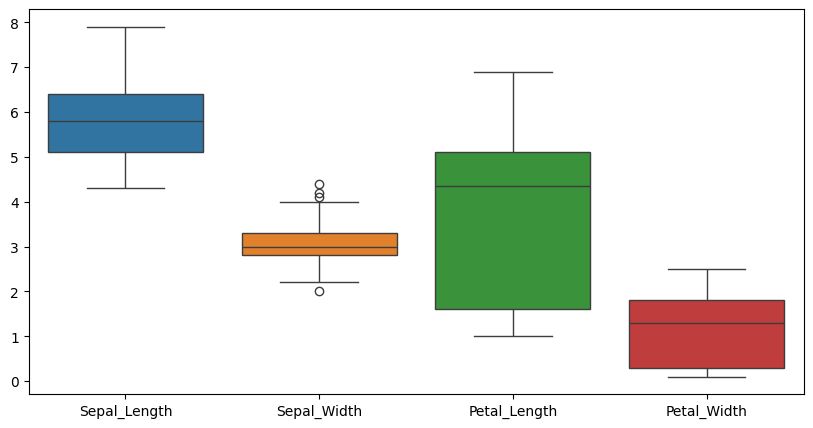

In [9]:
# plotando o boxplot das colunas
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_iris)
plt.show()

<Figure size 1000x500 with 0 Axes>

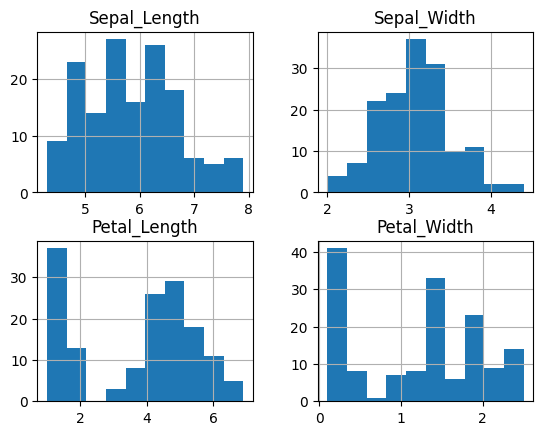

In [10]:
# plotando o histograma das colunas
plt.figure(figsize=(10, 5))
df_iris.hist()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as espécies? <br>
R: não, seria necessário fazer algumas caracterizações.

d. Aplique a regressão logística para avaliar o modelo de
classificação.

In [11]:
X = df_iris.drop('Species', axis=1)  # Características
y = df_iris['Species']  # Rótulos

# Dividir o conjunto de dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 1.00


e. Calcule a acurácia, precisão e recall.


In [12]:
# calculando precisão do modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo: {precision:.2f}')

Precisão do modelo: 1.00


In [13]:
# calculado recall do modelo
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo: {recall:.2f}')

Recall do modelo: 1.00


f. Plote a matriz de confusao com matplotlib ou seaborn


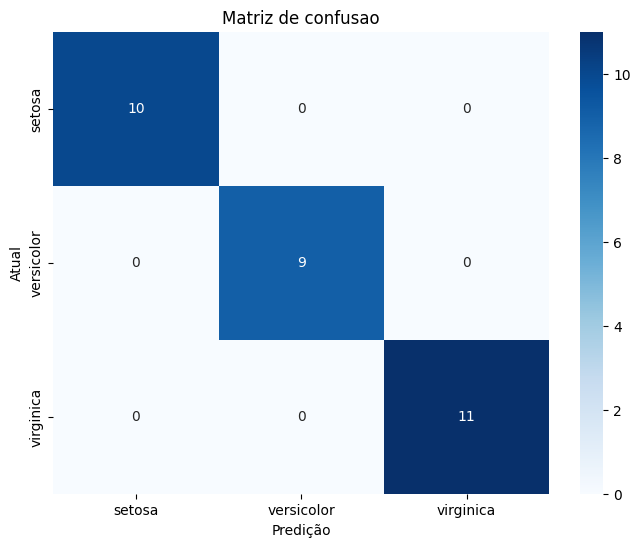

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.title('Matriz de confusao')
plt.show()

## Dataset load_digits

In [63]:
# importando o dataset
digits = datasets.load_digits()
df_digits = pd.DataFrame(digits.data)
df_digits['indice'] = digits.target
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,indice
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [64]:
# mostrando numero de colunas e linhas
linhas = df_digits.shape[0]
colunas = df_digits.shape[1]
print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

O dataset possui 1797 linhas e 65 colunas.


In [65]:
# mostrando dados nulos
dados_nulos = df_digits.isnull().sum().sum()
print(f'Existem {dados_nulos} dados nulos.')

Existem 0 dados nulos.


In [66]:
# separando colunas numericas e categoricas
colunas_numericas = df_digits.select_dtypes(include=[np.number]).columns
colunas_categoricas = df_digits.select_dtypes(exclude=[np.number]).columns

print(f'Existem {len(colunas_numericas)} colunas numéricas e {len(colunas_categoricas)} colunas categóricas.')

Existem 65 colunas numéricas e 0 colunas categóricas.


b. Aplique a regressão logística para avaliar o modelo de classificação.

In [72]:
# Definir X (features) e y (target) - y será a coluna 'indice' (os números de 0 a 9)
X = digits.data
y = digits.target

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de Regressão Logística
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logreg.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Acurácia do modelo: {accuracy:.2f}')
print(f'Precisão do modelo: {precision:.2f}')
print(f'Recall do modelo: {recall:.2f}')

Acurácia do modelo: 0.97
Precisão do modelo: 0.97
Recall do modelo: 0.97


d. Plote a matriz de confusão com matplotlib ou seaborn


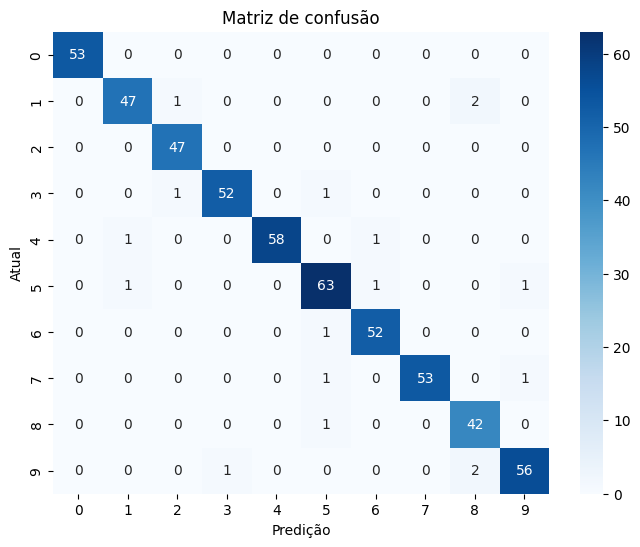

In [70]:
# calcular matriz de confusao
cm = confusion_matrix(y_test, y_pred)

# plotar matriz de confusão

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.title('Matriz de confusão')
plt.show()


e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.



In [44]:
# aplicar o modelo de classificação nos digitos 0-9
digits = datasets.load_digits()

# Verificar as features (imagens achatadas) e as classes (dígitos de 0 a 9)
X = digits.data  # Features: cada imagem 8x8 é achatada em um vetor de 64 pixels
y = digits.target  # Classes: valores correspondentes aos dígitos de 0 a 9

print(f"Shape das features (X): {X.shape}")
print(f"Shape dos rótulos (y): {y.shape}")

Shape das features (X): (1797, 64)
Shape dos rótulos (y): (1797,)


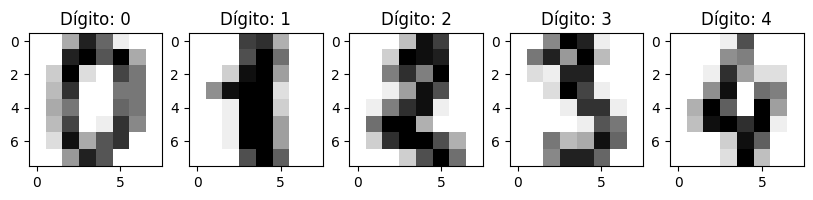

In [45]:
# plotando a visualização dos 5 primeiros números
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Dígito: {label}')
plt.show()

In [47]:
# dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criando e treinando o modelo de regressão logística
model = LogisticRegression(max_iter=10000)  # max_iter aumentado para garantir a convergência
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

f. Calcule a acurácia, precisão e recall.


In [53]:
# avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 0.9750

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



g. Plote a matriz de confusao com matplotlib ou seaborn

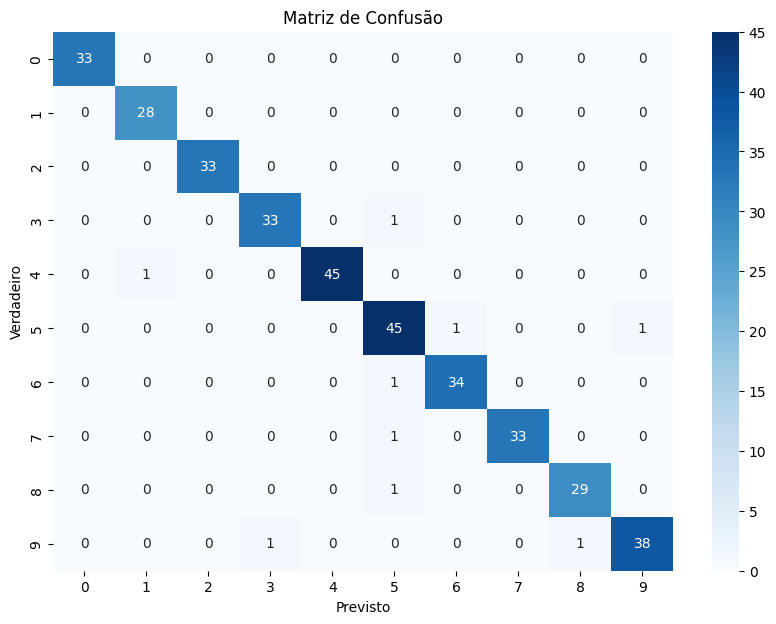

In [52]:
# plotando a matriz de confusão para o modelo
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()